In [32]:
from guacamol_baselines.smiles_lstm_hc.goal_directed_generation import  goal_directed_generation
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import os

db_storage = "paperGenerationSynth"
os.environ["DB_STORAGE"]= db_storage
mongo_url = os.getenv("MONGO_URL")

In [ ]:
goal_directed_generation(
        suite="pi3kmtor",
        synth_score="RSPred",
        n_epochs = 15,
        mols_to_sample = 256,
        keep_top = 64
)

version name :  pi3kmtor
selecting initial population...
smiles loaded ... ,len. ? 463
top k calculated
database :  pi3kmtorRSPred_10
going to score payload  177
going to score payload  149
going to score payload  127
going to score payload  115
going to score payload  92
going to score payload  88
going to score payload  87
going to score payload  73
going to score payload  49
going to score payload  50
going to score payload  59
going to score payload  53
going to score payload  62
going to score payload  49


In [ ]:
name_database = "pi3kmtorRSPred_10"

In [22]:
db = MongoClient(mongo_url)[db_storage]
results = pd.DataFrame(list(db[name_database].find({})))

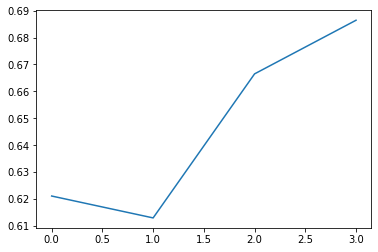

In [29]:
evolution_reward = results[["reward","epoch"]].groupby(by="epoch").mean()
plt.plot(evolution_reward.reward.to_list())
plt.title("Evolution of rewards")
plt.xlabel("Epochs")
plt.ylabel("Reward")